# Visual Analytics: Assignment 1

**Author**: Louise Brix Pilegaard Hansen

**Date**: March 3rd, 2023

In the shared drive ```cds-vis-data```, you'll find a directory comprising 1360 different images of flowers. Many of these are different images of the same flower.

In groups, do the following activity:

- Pick a random flower from the dataset, load it, and normalize it
- Compare that image's colour histogram to every *other* flower in the dataset
- Print save the filename of the 5 closest images, along with the distance score you calculated
  - **Hint:** use ```pandas```
- Qualitatively inspect the images - how does your algorithm perform?
- Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

In [18]:
# loading needed packages
import os
import sys
sys.path.append(os.path.join(".."))
import cv2
import numpy as np
import pandas as pd
from utils.imutils import jimshow
import matplotlib.pyplot as plt

## Pick a random flower from the dataset, load it, and normalize it

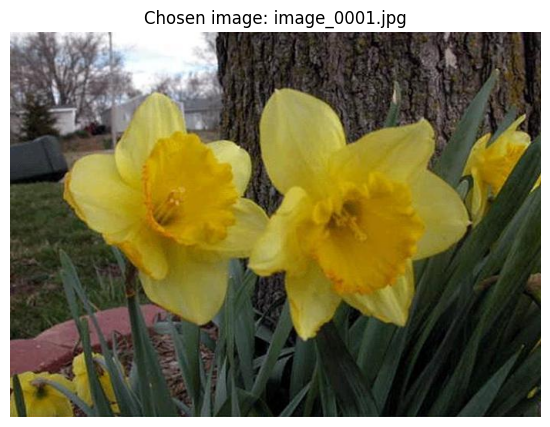

In [19]:
# loading my chosen image (the first one in the folder)
# as I am in the "nbs" folder, I am going two folders out to go into the "cds-vis-data" and "flowers" folder
image = cv2.imread(os.path.join("..", "..", "431824", "flowers", "image_0001.jpg")) # for some reason my "cds-vis-data" folder is called "431824" in UCloud
jimshow(image, "Chosen image: image_0001.jpg")

In [20]:
# calculate histogram for all three channels, using no mask, 8 pixel bins and 0-255 range
flower_hist = cv2.calcHist([image], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256]) 

# normalizing the flower histogram using min-max normalization
flower_hist_norm = cv2.normalize(flower_hist, flower_hist, 0, 1.0, cv2.NORM_MINMAX)

## Compare that image's colour histogram to every *other* flower in the dataset

In [21]:
# define filepath to "flowers" folder
filepath = os.path.join("..", "..", "431824", "flowers")

# creating two empty lists to append distance scores and filenames to
distances = []
filenames = []

# this loops over every file in the defined filepath, i.e., every file in the "flowers" folder
for file in os.listdir(filepath):
    if file == "image_0001.jpg": # if the file is my chosen image, continue to next file in the folder instead
        continue
    else:
        new_path = os.path.join(filepath, file) # defining path to the image
        new_im = cv2.imread(new_path) # reading the image
        new_flower_hist = cv2.calcHist([new_im], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256]) #create color histogram for that image
        new_flower_hist_norm = cv2.normalize(new_flower_hist, new_flower_hist, 0, 1.0, cv2.NORM_MINMAX) # normalize it as before

        # calculate distance score between the chosen image and new image
        distance_score = round(cv2.compareHist(flower_hist_norm, new_flower_hist_norm, cv2.HISTCMP_CHISQR), 2)

        # append the filenames and scores to the "distances" and "filenames" lists
        distances.append(distance_score)
        filenames.append(file)

## Print save the filename of the 5 closest images, along with the distance score you calculated

In [22]:
# creating a pandas dataframe by converting the two lists to pandas-series with the column-labels "filename" and "distance_score", 
data = pd.DataFrame({"filename" : pd.Series(filenames),
                     "distance_score" : pd.Series(distances)})

In [23]:
 # sorting the dataframe by the distance scores, in ascending order
sorted_data = data.sort_values('distance_score', ascending = True)

# extracting the first five rows, i.e., the five closest images by distance score
closest_images = sorted_data[0:5]

print(closest_images)

            filename  distance_score
295   image_0597.jpg            4.87
997   image_0594.jpg            5.03
64    image_0614.jpg            5.55
1236  image_0104.jpg            5.67
882   image_1126.jpg            5.68


## Qualitatively inspect the images - how does your algorithm perform?

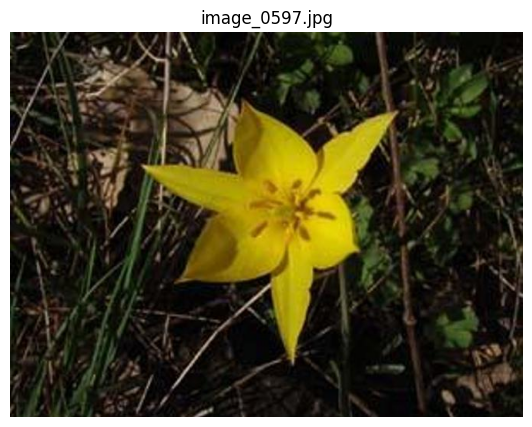

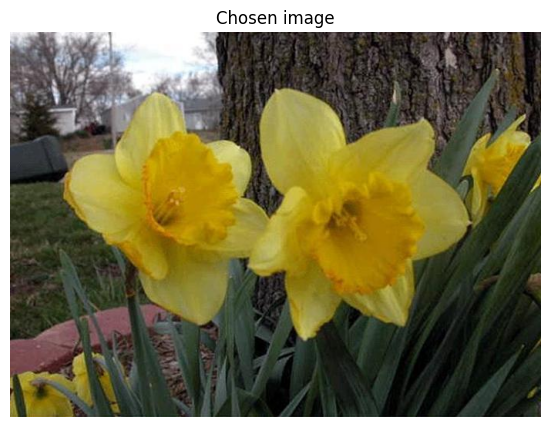

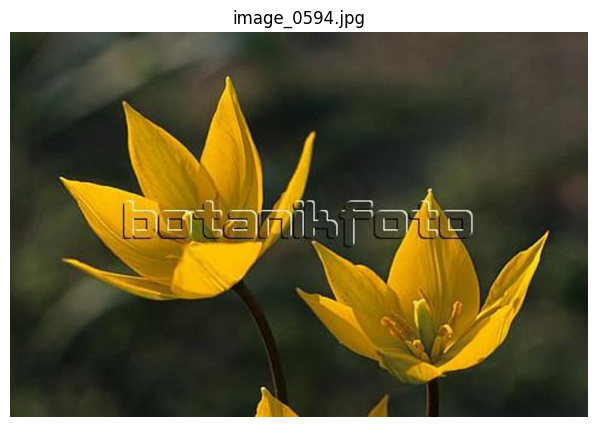

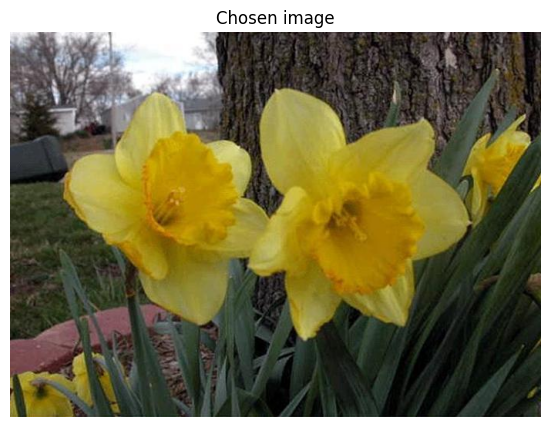

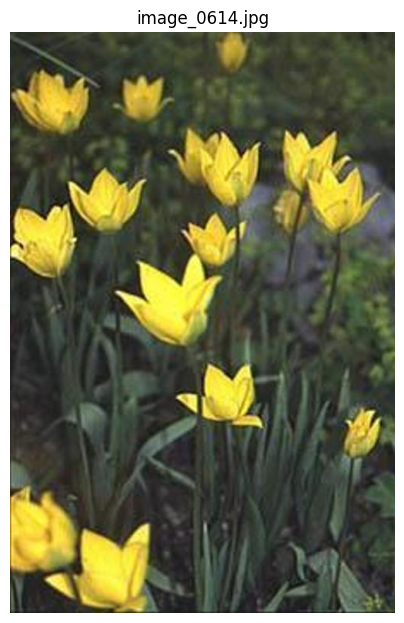

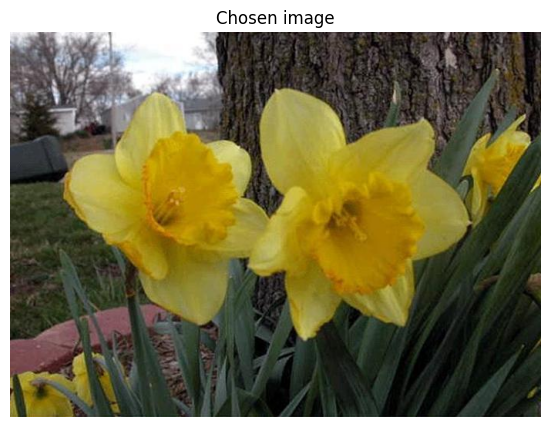

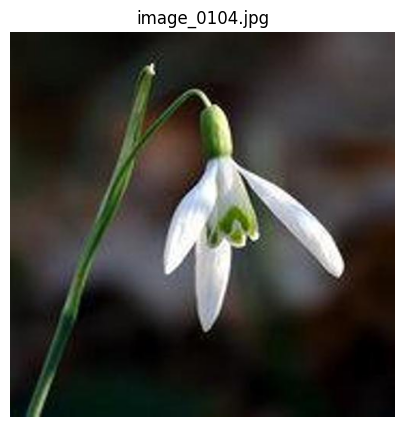

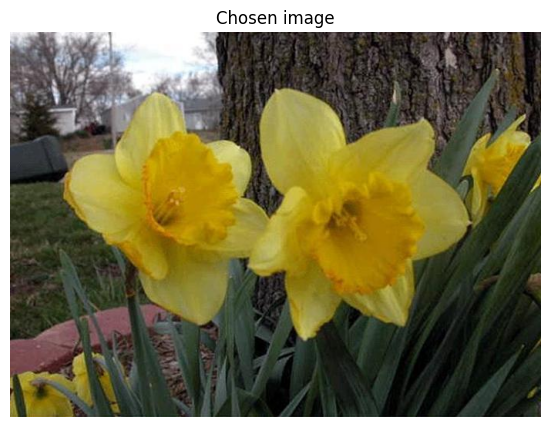

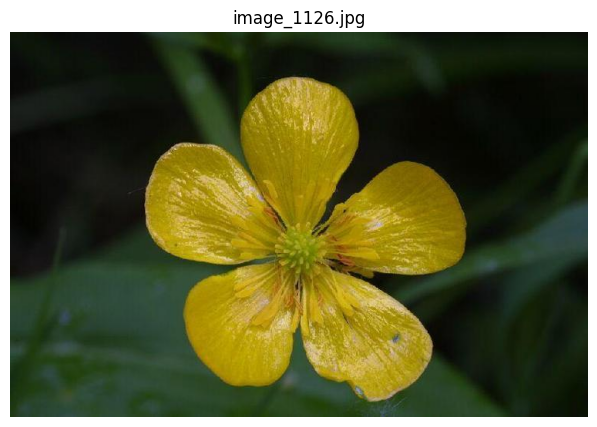

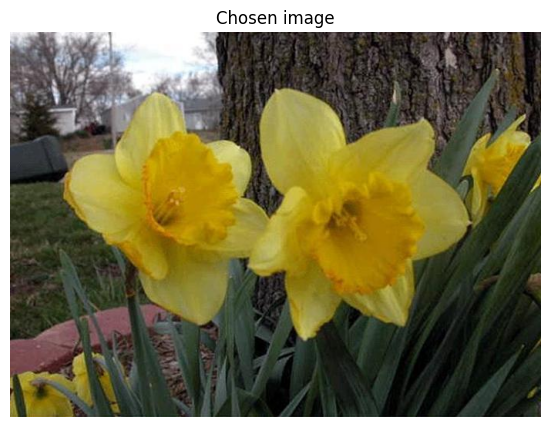

In [24]:
# printing the five closest images along with the chosen image
for file in closest_images['filename']:
    im_path = os.path.join(filepath, file) # using the same filepath as defined before
    new_im = cv2.imread(im_path)
    jimshow(new_im, file)
    jimshow(image, "Chosen image")

The two closest image by distance score is *image_0597* and *image_0594*. Like the chosen image, the flowers in these images are also yellow and the background of the images contain a mixture of browns and greens, again like the chosen image. The colorschemes of the flowers appear to match the chosen image well. It is, however, not the same flower as the original image, which indicates that the algorithm does not work perfectly in this case. The third closest image also contains a lot of yellow and green, but not that much brown, which could explain the third place. 

Surprisingly, the fourth closest image is a white flower. This is surprising as the yellow color is arguably the most prominent thing about the chosen image (when inspecting it qualitatively). Again, this is not a very good match by the algorithm, as it is neither the right flower or the right color. The fifth closest image is of a yellow flower on a green background, but yet again lacking the brown that is present in the chosen image. 

Overall, by qualitatively inspecting the output, the algorithm performs adequately for the first three images when only looking at the color scales, which of course makes sense, as it is comparing color histograms. However, it also produces some strange results, considering that the image of the white flower is the fourth closest image according to the algorithm. To conclude, this algorithm, which compares color histograms, can be useful for detecting images with fairly similar color schemes, but not as useful for detecting similar objects, in this case flowers. 

## Rewrite your code as a function which takes any input filename from a user and produces the new results showing top 5 closest images for the chosen image

In [25]:
def flower_fun(filename:str, filepath:str) -> pd.core.frame.DataFrame:

    '''
    This function calculates a color histogram from an input image and compares it to every other image in the input filepath by distance scores. 
    The function returns a Pandas DataFrame containing the 5 closest images measured by distance scores.

    Arguments:
    filename: the filename of the chosen input image. The file must be located in the "filepath" directory.
    filepath: the filepath to the directory where the chosen input image and the images to be compared are located.
    
    '''
    path_input_im = os.path.join(filepath, filename) # define filepath to input image
    input_im = cv2.imread(path_input_im) # read input image
    hist1 = cv2.calcHist([input_im], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256]) # calculate histogram for the input image
    hist1_norm = cv2.normalize(hist1, hist1, 0, 1.0, cv2.NORM_MINMAX) # normalize histogram

    # create empty lists 
    distances = []
    filenames = []

    # loop over every file in the input filepath
    for other_file in os.listdir(filepath):
        if other_file == filename: # if the file is the input filename, continue to next iteration
            continue
        else:
            new_path = os.path.join(filepath, other_file) # define path to image
            new_im = cv2.imread(new_path) # load image
            hist2 = cv2.calcHist([new_im], [0,1,2], None, [8,8,8], [0,256, 0,256, 0,256]) # calculate histogram
            hist2_norm = cv2.normalize(hist2, hist2, 0, 1.0, cv2.NORM_MINMAX) 

            # calculate distance score
            distance_score = round(cv2.compareHist(hist1_norm, hist2_norm, cv2.HISTCMP_CHISQR), 2)

            distances.append(distance_score)
            filenames.append(other_file)

    # create dataframe from the two lists by converting them to pandas-series
    data = pd.DataFrame({"filename" : pd.Series(filenames),
                        "distance_score" : pd.Series(distances)})

    # sorting the dataframe by the distance scores, in ascending order
    sorted_data = data.sort_values('distance_score', ascending = True) 

    # extracting first five rows
    closest_images = sorted_data[0:5]

    return(closest_images)

In [26]:
# testing that the function gives me the same results as my previous loop
path = os.path.join("..", "..", "431824", "flowers")
test = flower_fun("image_0001.jpg", path)
print(test) # it does

            filename  distance_score
295   image_0597.jpg            4.87
997   image_0594.jpg            5.03
64    image_0614.jpg            5.55
1236  image_0104.jpg            5.67
882   image_1126.jpg            5.68


In [27]:
# testing on another image
test_two = flower_fun("image_0057.jpg", path)

test_image = cv2.imread(os.path.join(filepath, "image_0057.jpg"))

for file in test_two['filename']:
    im_path = os.path.join(filepath, file)
    new_im = cv2.imread(im_path)
    jimshow(new_im, file)
    jimshow(test_image, "Chosen image")

            filename  distance_score
874   image_0566.jpg            1.95
438   image_1166.jpg            2.85
6     image_0948.jpg            2.89
1038  image_1325.jpg            3.33
510   image_0535.jpg            3.90
